# Simulation de Percussion 1D

In [89]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image

Ce notebook simule la percussion entre deux floes. Le deuxième floe reste encastré dans le premier après la collision (voir image ci-bas). Les détails de la modélisation sont dans le rapport de stage. Pour simplifier les écritures, les variables $m'$, $k'$, et $\mu'$ sont notées respectivement $m_{-}$, $k_{-}$, et $\mu_{-}$.

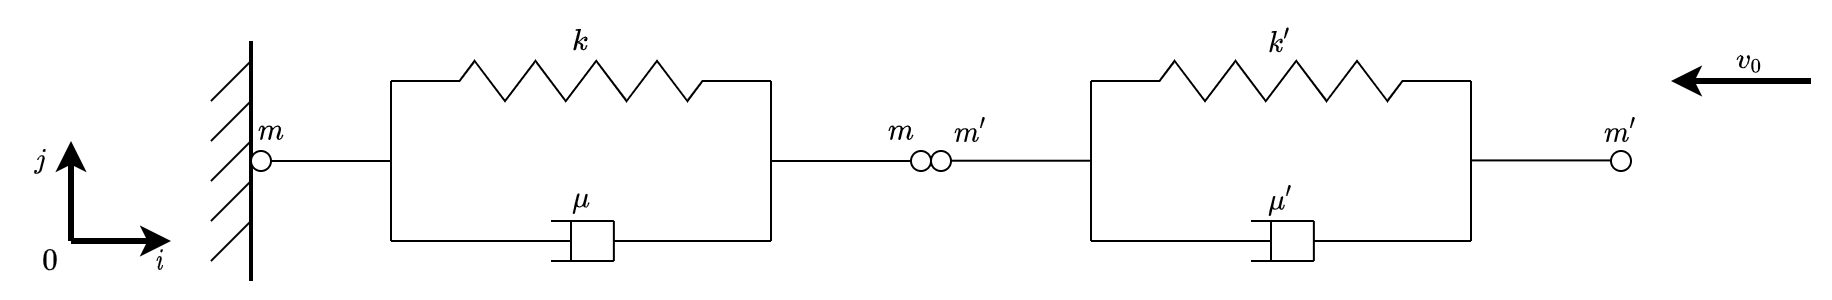

In [90]:
Image("./Percussion1D-Systeme.png")

## Simple plot

Observons un simple plot avec les constantes décrites ci-contre.

In [91]:
## Les constantes
m = 1.0
m_ = 1.0

k = 2.0
k_ = 1.0

mu = 1.0
mu_ = 2.0

Y_0 = np.array([0,0, 0, -1.0])

In [92]:
E = np.array([[0,0,1.0,0], 
              [0,0,0,1.0], 
              [(k+k_)/(m+m_), -k_/(m+m_), (mu+mu_)/(m+m_), -mu_/(m+m_)], 
              [-k_/m_, k_/m_, -mu_/m_, mu_/m_]])

print(E)

[[ 0.   0.   1.   0. ]
 [ 0.   0.   0.   1. ]
 [ 1.5 -0.5  1.5 -1. ]
 [-1.   1.  -2.   2. ]]


In [93]:
N = 1000
t = np.linspace(0,4, N+1)

In [94]:
def model(Y, t):
  return E @ Y

Y = odeint(model, Y_0, t)

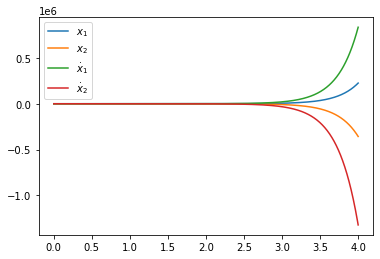

In [95]:
plt.plot(t, Y[:,0], label='$x_1$')
plt.plot(t, Y[:,1], label='$x_2$')
plt.plot(t, Y[:,2], label='$\dot{x}_1$')
plt.plot(t, Y[:,3], label='$\dot{x}_2$')
plt.legend()
plt.show()

## Interactive plot

Observons un plot interactif dans lesquel on pourra faire varier les paramètres du modèle. Il faudra installer le package [Bokeh](https://bokeh.org/) pour que ca fonctionne.

In [96]:
from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [97]:
Y = np.zeros(shape=(N+1, 4))

p = figure(title="Plot des déplacements et vitesses", plot_height=300, plot_width=600, y_range=(-10,10),
           background_fill_color='#efefef')
x1 = p.line(t, Y[:,0], color="blue", line_width=1.5, alpha=0.8, legend_label='x_1')
x2 = p.line(t, Y[:,1], color="orange", line_width=1.5, alpha=0.8, legend_label='x_2')
x1dot = p.line(t, Y[:,2], color="green", line_width=1.5, alpha=0.8, legend_label='\dot x_1')
x2dot = p.line(t, Y[:,3], color="red", line_width=1.5, alpha=0.8, legend_label='\dot x_2')

In [98]:
def update(m=1.0, m_=1.0, k=2.0, k_=1.0, mu=1.0, mu_=2.0, v0=-1.0, tmax=2.0):
    E = np.array([[0,0,1.0,0], 
              [0,0,0,1.0], 
              [(k+k_)/(m+m_), -k_/(m+m_), (mu+mu_)/(m+m_), -mu_/(m+m_)], 
              [-k_/m_, k_/m_, -mu_/m_, mu_/m_]])
    Y_0 = np.array([0,0, 0, v0])
    t = np.linspace(0,tmax, N+1)
    
    def model(Y, t):
          return E @ Y
    Y = odeint(model, Y_0, t)
    
    x1.data_source.data['y'] = Y[:,0]
    x2.data_source.data['y'] = Y[:,1]
    x1dot.data_source.data['y'] = Y[:,2]
    x2dot.data_source.data['y'] = Y[:,3]
    
    push_notebook()

In [99]:
show(p, notebook_handle=True)

In [103]:
interact(update, m=(0,10,0.1), m_=(0,10,0.1), 
         k=(0,10,0.1), k_=(0,10,0.1), 
         mu=(0,10,0.1), mu_=(0,10,0.1), 
         v0=(-5,5,0.1), tmax=(0,10,0.1));

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0), FloatSlider(value=1.0, description='m…

En somme, malgrès le dispositif visqueux et les constantes $\mu$ et $\mu'$, les déplacements et les vitesses semblent exploser après un certains temps. Le système ne ralentit pas, il n'évolue pas vers un état d'équilibre. <strong>Ce n'est pas normal !<strong>